## Data Exploration
The aim of this project is to explore the data and seek out possible trends and also understand the data provided by Retailer X to able able to carry out futher analysis later on.

In [1]:
from csv import reader
import numpy as np
import pandas as pd
import types

In [2]:
product_data = pd.read_csv("C:\\Users\\USER\\Documents\\python\\Product Data Set - Student 2 of 3.csv", sep= "|")
product_data.head()

,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,30001,HEALTH & BEAUTY,$7.45
1,30002,HEALTH & BEAUTY,$5.35
2,30003,HEALTH & BEAUTY,$5.49
3,30004,HEALTH & BEAUTY,$6.46
4,30005,HEALTH & BEAUTY,$7.33


In [3]:
#import transaction data
transaction_data = pd.read_csv("C:\\Users\\USER\\Documents\\python\\Transaction Data Set - Student 3 of 3.csv", sep= "|")
transaction_data.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT
0,10114,30011,4,0.0,1/2/2015,0
1,10217,30016,3,0.0,1/2/2015,0
2,10224,30013,4,0.0,1/2/2015,0
3,10103,30012,3,0.2,1/2/2015,0
4,10037,30010,8,0.0,1/2/2015,0


In [4]:
#import the customer data
customer_data = pd.read_csv("C:\\Users\\USER\\Documents\\python\\Customer Data Set - Student 1 of 3.csv")
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,"$133,498",5,enrolled,06-03-2013,4,Single
1,10002,0,42,"$94,475",9,notenrolled,NaN,6,Married
2,10003,0,40,"$88,610",9,enrolled,02-09-2010,5,Married
3,10004,0,38,"$84,313",8,enrolled,06-04-2015,1,Single
4,10005,0,30,"$51,498",3,notenrolled,NaN,1,Single


## Quick Data Exploration
In this section, I would explore some columns in the various data to determine the type associated with these columns. First we would check the number of rows and columns we have in each dataset.

In [5]:
print("The (rows, columns) in the product dataset is", product_data.shape)
print("The (rows, columns) in the transaction dataset is", transaction_data.shape)
print("The (rows, columns) in the customer dataset is", customer_data.shape)


The (rows, columns) in the product dataset is (30, 3)
The (rows, columns) in the transaction dataset is (10000, 6)
The (rows, columns) in the customer dataset is (500, 9)


From the above, it is discovered that Retailer X has a record of 500 customers and sells 30 products in a total of 10,000 transactions.

In [6]:
print(type(customer_data))
print(type(customer_data.AGE))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [7]:
print(customer_data.dtypes, "\n")
print(transaction_data.dtypes, "\n")
print(product_data.dtypes, "\n")

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME              object
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object 

CUSTOMER NUM            int64
PRODUCT NUM             int64
QUANTITY PURCHASED      int64
DISCOUNT TAKEN        float64
TRANSACTION DATE       object
STOCKOUT                int64
dtype: object 

PRODUCT CODE         int64
PRODUCT CATEGORY    object
UNIT LIST PRICE     object
dtype: object 



We need to remove the "$" and "," from the "INCOME" column in the customer dataset and then convert it to an int so we can work on it.

In [8]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: x.replace('$', '')).map(lambda x: x.replace(',', ''))
customer_data.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS
0,10001,0,64,133498,5,enrolled,06-03-2013,4,Single
1,10002,0,42,94475,9,notenrolled,NaN,6,Married
2,10003,0,40,88610,9,enrolled,02-09-2010,5,Married
3,10004,0,38,84313,8,enrolled,06-04-2015,1,Single
4,10005,0,30,51498,3,notenrolled,NaN,1,Single


In [9]:
customer_data['INCOME'] = customer_data['INCOME'].map(lambda x: int(x))
print(customer_data.dtypes)

CUSTOMERID           int64
GENDER               int64
AGE                  int64
INCOME               int64
EXPERIENCE SCORE     int64
LOYALTY GROUP       object
ENROLLMENT DATE     object
HOUSEHOLD SIZE       int64
MARITAL STATUS      object
dtype: object


In [10]:
customer_data.describe()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,HOUSEHOLD SIZE
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,10250.500000,0.498000,42.316000,85792.482000,6.554000,2.894000
std,144.481833,0.500497,17.567509,37157.766304,2.497912,1.597457
min,10001.000000,0.000000,18.000000,20256.000000,1.000000,1.000000
25%,10125.750000,0.000000,30.000000,52429.000000,5.000000,2.000000
50%,10250.500000,0.000000,39.000000,86846.500000,7.000000,3.000000
75%,10375.250000,1.000000,50.250000,118381.000000,9.000000,4.000000
max,10500.000000,1.000000,90.000000,149999.000000,10.000000,6.000000


In [11]:
customer_data["MARITAL STATUS"].describe()

count         500
unique          4
top       Married
freq          267
Name: MARITAL STATUS, dtype: object

In [12]:
marital = {}
for x in customer_data["MARITAL STATUS"]:
    if x in marital:
        marital[x] += 1
    else:
        marital[x]=1
        
print(marital)

{'Single': 180, 'Married': 267, 'Divorced': 37, 'Widow/Widower': 16}


In [13]:
#same as the above but shorter and faster
customer_data["MARITAL STATUS"].unique()

array(['Single', 'Married', 'Divorced', 'Widow/Widower'], dtype=object)

In [14]:
from datetime import datetime
customer_data['ENROLLMENT DATE'] = customer_data['ENROLLMENT DATE'][customer_data["ENROLLMENT DATE"].notnull()].map(lambda x:datetime.strptime(x, '%d-%m-%Y'))

In [15]:
customer_data.dtypes

CUSTOMERID                   int64
GENDER                       int64
AGE                          int64
INCOME                       int64
EXPERIENCE SCORE             int64
LOYALTY GROUP               object
ENROLLMENT DATE     datetime64[ns]
HOUSEHOLD SIZE               int64
MARITAL STATUS              object
dtype: object

In [16]:
print("null values for transactions?", transaction_data.isnull().values.any())
print("null values for customers?", customer_data.isnull().values.any())
print("null values for products?", product_data.isnull().values.any())

null values for transactions? False
null values for customers? True
null values for products? False


In [17]:
customer_data.columns[customer_data.isna().any()].tolist()

['ENROLLMENT DATE']

In [18]:
import matplotlib.pyplot as plt

## Analysis of the Distribution by using Graphs

To know the proportion of married customers to those who are not marrried, we plot the following barchart.

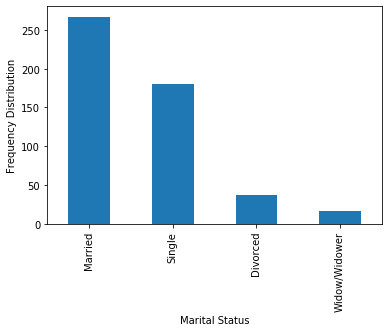

In [19]:
customer_data['MARITAL STATUS'].value_counts().plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Frequency Distribution')
plt.show()

It can be seen that more than half of Retailer X customers are married, this might affect their choice of produtcs.    Next we would look at the age distribution of the customers by plotting a Histogram into 10 intrervals

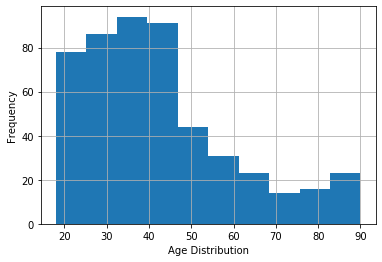

In [20]:
customer_data['AGE'].hist(bins=10)
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.show()
plt.show()

It can be seen that modt of Retailer X customers are between the age of 20-50 years. This same information can be shown using the box plot.

<function matplotlib.pyplot.show(*args, **kw)>

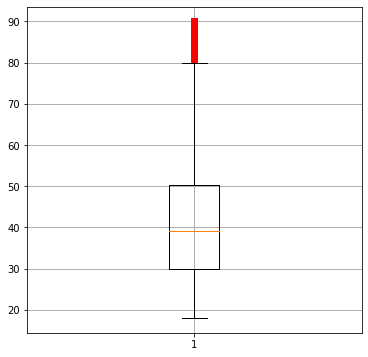

In [21]:
plt.figure(figsize=(6,6))
plt.boxplot(customer_data.AGE, 0, 'rs', 1)
plt.grid(linestyle='-', linewidth=1)
plt.show

## Creating a Customer View
We have two important objectives.
- Understanding the factors associated with loyalty program participation.
- Understanding the factors associated with increased spending.
- To carry out these two objectives, we would need to join the Transactions data with the products data because transaction does not indicate the unit price of the sold products, it refers to the product number, not the product.

In [22]:
trans_product = transaction_data.merge(product_data, how="inner", left_on = 'PRODUCT NUM', right_on = 'PRODUCT CODE')

In [23]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,$25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,$25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,$25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,$25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,$25.46


In [24]:
trans_product['UNIT LIST PRICE'] = trans_product['UNIT LIST PRICE'].map(lambda x: float(x.replace('$', '')))

In [25]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46


In [26]:
trans_product['Total Price']= trans_product['QUANTITY PURCHASED'] * trans_product['UNIT LIST PRICE'] *(1-trans_product['DISCOUNT TAKEN'])

In [27]:
trans_product.head()

,CUSTOMER NUM,PRODUCT NUM,QUANTITY PURCHASED,DISCOUNT TAKEN,TRANSACTION DATE,STOCKOUT,PRODUCT CODE,PRODUCT CATEGORY,UNIT LIST PRICE,Total Price
0,10114,30011,4,0.0,1/2/2015,0,30011,APPAREL,25.46,101.840
1,10086,30011,6,0.0,1/2/2015,0,30011,APPAREL,25.46,152.760
2,10174,30011,10,0.0,1/2/2015,0,30011,APPAREL,25.46,254.600
3,10401,30011,12,0.0,1/2/2015,0,30011,APPAREL,25.46,305.520
4,10216,30011,12,0.1,1/2/2015,0,30011,APPAREL,25.46,274.968


In [28]:
income_by_product = trans_product.groupby('PRODUCT CATEGORY').agg({"Total Price":'sum'}).sort_values("Total Price")

In [29]:
income_by_product

,Total Price
PRODUCT CATEGORY,
HEALTH & BEAUTY,54776.312
FOOD,96044.610
APPAREL,936757.914
ELECTRONICS,1607192.422


In [30]:
Revenue_by_product = income_by_product.rename(columns={'Total Price': 'Revenue Per Product'})

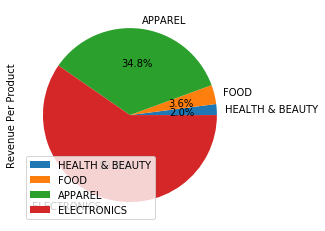

In [31]:
Revenue_by_product['Revenue Per Product'].plot(kind='pie', autopct ="%1.1f%%", legend = True)

Next, we would calculate for each customer the following measures and see whether any of these measures affacts loyalty enrolment:
- Total spends per product category
- Total spends
- Most recent transaction dates
- Average Discount taken

In [32]:
customer_prod_categ= trans_product.groupby(['CUSTOMER NUM', 'PRODUCT CATEGORY']).agg({"Total Price": 'sum'})

In [33]:
customer_prod_categ.head()

Total Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [34]:
customer_prod_categ.columns

Index(['Total Price'], dtype='object')

In [35]:
customer_prod_categ = customer_prod_categ.reset_index()

In [36]:
customer_pivot = customer_prod_categ.pivot(index ='CUSTOMER NUM', columns = 'PRODUCT CATEGORY', values = 'Total Price')

In [37]:
customer_pivot.head()

PRODUCT CATEGORY,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY
CUSTOMER NUM,,,,
10001,4022.430,1601.315,68.688,1134.337
10002,2312.509,2473.163,276.779,NaN
10003,2887.382,5414.418,260.640,NaN
10004,3637.213,1840.211,45.270,NaN
10005,213.512,NaN,NaN,NaN


NaN indicates that the customer did not buy any of the product category.

Next, we calculate the latest transaction date and the total spend for each customer.


In [38]:
trans_product['TRANSACTION DATE']= trans_product['TRANSACTION DATE'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [39]:
recent_trans_total_spend = trans_product.groupby('CUSTOMER NUM').agg({'TRANSACTION DATE': 'max', 'Total Price': 'sum'}).rename(columns= {'TRANSACTION DATE' : 'RECENT TRANSACTION DATE', 'Total Price': 'TOTAL SPENT'})
recent_trans_total_spend.head()

,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,
10001,2015-12-24,6826.770
10002,2015-12-21,5062.451
10003,2015-12-31,8562.440
10004,2015-12-17,5522.694
10005,2015-12-22,213.512


In [40]:
#the code joins the two data together to show the total spent and recent transaction date of each customer.
customer_KPIs = customer_pivot.merge(recent_trans_total_spend, how = 'inner', left_index= True, right_index=True)

In [41]:
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,NaN,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,NaN,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,NaN,2015-12-17,5522.694
10005,213.512,NaN,NaN,NaN,2015-12-22,213.512


In [42]:
#the code below replaces the NaN with 0
customer_KPIs = customer_KPIs.fillna(0)
customer_KPIs.head()

,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
CUSTOMER NUM,,,,,,
10001,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
10002,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
10003,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
10004,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
10005,213.512,0.000,0.000,0.000,2015-12-22,213.512


In [43]:
#the code below joins the customer_kpis and the customer_data together to provide a view of Retailer X customers.
customer_all_view = customer_data.merge(customer_KPIs, how = 'inner', left_on= 'CUSTOMERID', right_index = True)

In [44]:
customer_all_view.head()

,CUSTOMERID,GENDER,AGE,INCOME,EXPERIENCE SCORE,LOYALTY GROUP,ENROLLMENT DATE,HOUSEHOLD SIZE,MARITAL STATUS,APPAREL,ELECTRONICS,FOOD,HEALTH & BEAUTY,RECENT TRANSACTION DATE,TOTAL SPENT
0,10001,0,64,133498,5,enrolled,2013-03-06,4,Single,4022.430,1601.315,68.688,1134.337,2015-12-24,6826.770
1,10002,0,42,94475,9,notenrolled,NaT,6,Married,2312.509,2473.163,276.779,0.000,2015-12-21,5062.451
2,10003,0,40,88610,9,enrolled,2010-09-02,5,Married,2887.382,5414.418,260.640,0.000,2015-12-31,8562.440
3,10004,0,38,84313,8,enrolled,2015-04-06,1,Single,3637.213,1840.211,45.270,0.000,2015-12-17,5522.694
4,10005,0,30,51498,3,notenrolled,NaT,1,Single,213.512,0.000,0.000,0.000,2015-12-22,213.512


This newly created dataset is what we would use for our final analysis.

In [45]:
#the code below cross-tables gender and loyalty group, cross-tabulating is used for comparing the relationship btw 2 variables
table= pd.crosstab(customer_all_view['GENDER'], customer_all_view['LOYALTY GROUP'])
table

LOYALTY GROUP,enrolled,notenrolled
GENDER,,
0,131,120
1,133,116


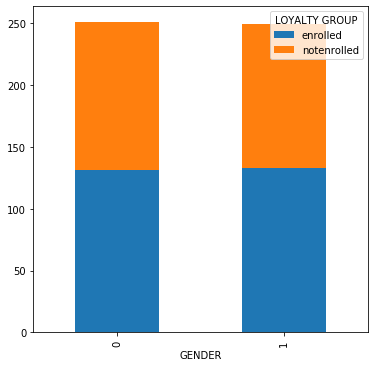

In [46]:
table.plot(kind='bar', stacked= True, figsize=(6,6))
plt.show()

from the chart above, we can say being male or female does not affect the enrollment for the loyalty program much, the ratio of enrolled to non-enrolled is the same for both genders.

 Next we check if the experience score affects customers enrollment. we do similar process as above.

In [47]:
table1 = pd.crosstab(customer_all_view['EXPERIENCE SCORE'], customer_all_view['LOYALTY GROUP'])
table1

LOYALTY GROUP,enrolled,notenrolled
EXPERIENCE SCORE,,
1,0,28
2,0,19
3,0,18
4,0,22
5,43,23
6,48,32
7,49,22
8,42,21
9,44,28


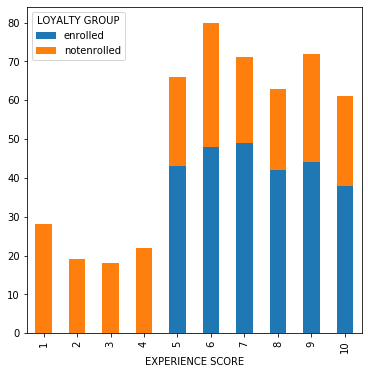

In [48]:
table1.plot(kind='bar', stacked=True, figsize=(6,6))

from this we can see that a customers experience score affects the loyalty enrollment.
- Customers with experience score below 5 (1-4) did not enroll at all
- Customers with experience score from 5 and above (5-10) are more likely to enroll.
- if a customer experience score is 5 or more, they are likely to join with a probabilty of 60-70%.

Next we check for marital status using the same process.

In [49]:
table2 = pd.crosstab(customer_all_view['MARITAL STATUS'], customer_all_view['LOYALTY GROUP'])
table2

LOYALTY GROUP,enrolled,notenrolled
MARITAL STATUS,,
Divorced,15,22
Married,144,123
Single,96,84
Widow/Widower,9,7


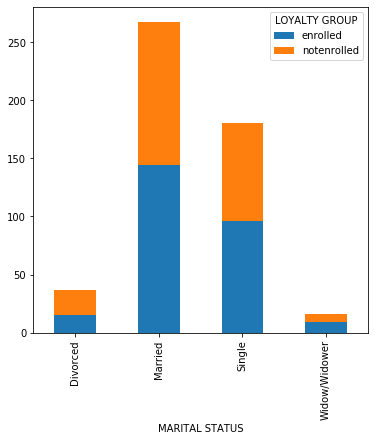

In [50]:
table2.plot(kind='bar', stacked=True, figsize=(6,6))

From the chart above, marital status does not have much effect on customers enrollment to the loyalty program. The ratios of enrolled to not_enrolled appears to be almost the same for the marital status.

In [51]:
#the code below bins values into discrete intervals, in this case, 10 intervals
customer_all_view['AGE BINNED'] = pd.cut(customer_all_view['AGE'], 10)
customer_all_view['AGE BINNED'].value_counts()

(32.4, 39.6]      94
(39.6, 46.8]      91
(25.2, 32.4]      86
(17.928, 25.2]    78
(46.8, 54.0]      51
(54.0, 61.2]      24
(82.8, 90.0]      23
(61.2, 68.4]      23
(75.6, 82.8]      16
(68.4, 75.6]      14
Name: AGE BINNED, dtype: int64

In [52]:
table3 = pd.crosstab(customer_all_view['AGE BINNED'], customer_all_view['LOYALTY GROUP'])
table3

LOYALTY GROUP,enrolled,notenrolled
AGE BINNED,,
"(17.928, 25.2]",52,26
"(25.2, 32.4]",30,56
"(32.4, 39.6]",30,64
"(39.6, 46.8]",43,48
"(46.8, 54.0]",40,11
"(54.0, 61.2]",19,5
"(61.2, 68.4]",15,8
"(68.4, 75.6]",9,5
"(75.6, 82.8]",11,5


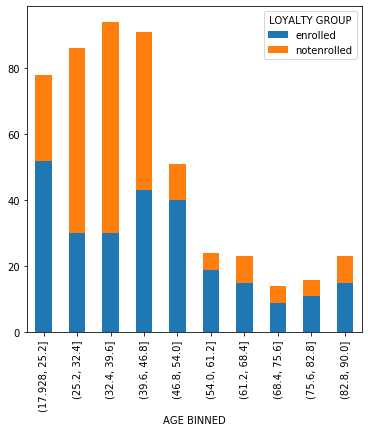

In [53]:
table3.plot(kind='bar', stacked=True, figsize=(6,6))
plt.show()

From the chart above, middle aged customers are less likely to join loyalty programs, and younger and elderly people are more likely to join.

In [54]:
customer_all_view.groupby('LOYALTY GROUP').agg({'AGE': 'mean'})

,AGE
LOYALTY GROUP,
enrolled,44.723485
notenrolled,39.622881


The above tells us that the enrolled customers have a slightly higher avg age, to see this better we use a box plot to represent it.

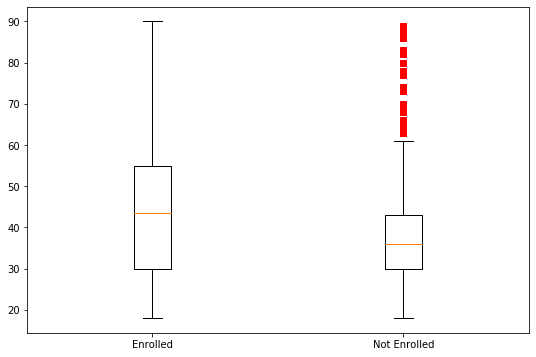

In [55]:
fig = plt.figure(1, figsize=(9,6))
ax= fig.add_subplot(111)
plot1= customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=='enrolled']
plot2= customer_all_view['AGE'][customer_all_view['LOYALTY GROUP']=='notenrolled']
list1=[plot1, plot2]
ax.boxplot(list1, 0, 'rs', 1)
ax.set_xticklabels(['Enrolled', 'Not Enrolled'])
plt.show()

The distribution of age for enrolled customer is more dispered than the same for non-enrolled ones.
The chart shows that 75% of customers that are enrolled in the loyalty program are below the age of 55, and 75% of non_enrolled are below the age of 43.

In [56]:
#Total Spent is a continous variable, so we bin it into 10 discrete intervals
customer_all_view['Total Spent Binned']= pd.cut(customer_all_view['TOTAL SPENT'], 10)
customer_all_view['Total Spent Binned'].value_counts()

(6117.455, 7641.817]      100
(4593.094, 6117.455]       98
(3068.733, 4593.094]       71
(4.766, 1544.371]          68
(7641.817, 9166.178]       59
(1544.371, 3068.733]       56
(9166.178, 10690.539]      29
(10690.539, 12214.9]        9
(12214.9, 13739.262]        7
(13739.262, 15263.623]      3
Name: Total Spent Binned, dtype: int64

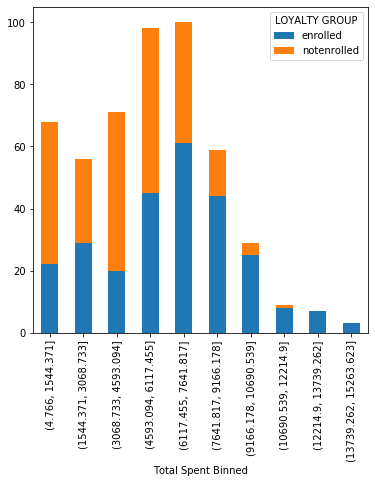

In [57]:
table4 = pd.crosstab(customer_all_view['Total Spent Binned'], customer_all_view['LOYALTY GROUP'])
table4.plot(kind='bar', stacked = True, figsize=(6,6))
plt.show()

The chart shows that as the total spending of customers increases, so does their chances of enrollment as well.

Next we investigate the relationship between loyalty and household size

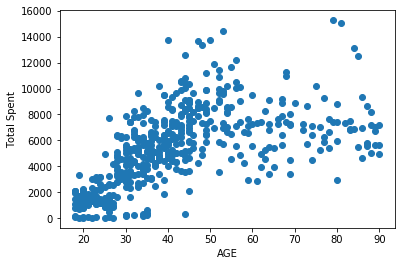

In [58]:
#we would check how age affects the total spent by a customer
#since age and total spent are both continous variables, we show this on a scatter plot.
plt.scatter(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])
plt.xlabel('AGE')
plt.ylabel('Total Spent')
plt.show()

the figure above shows that there is a positive relationship btw age and the total spent. That is, the total amount spent increases as the age increases.

In [59]:
from scipy.stats import pearsonr
pearsonr(customer_all_view['AGE'], customer_all_view['TOTAL SPENT'])


(0.5760170677259272, 1.560821750277651e-45)

The above shows the relationship between the two variables. The pearsonr standard outpu is bwtn -1.0 to 1.0. 0.576 implies a moderately strong correlation.

In [60]:
#we use a scatter plot to show the relationship btw income and total spend.


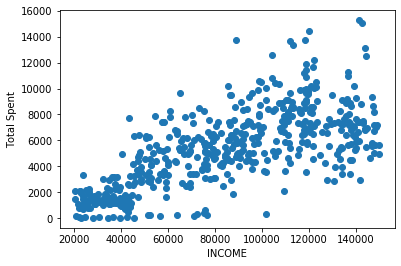

In [61]:
plt.scatter(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])
plt.xlabel('INCOME')
plt.ylabel('Total Spent')
plt.show()

In [62]:
#NEXT we show the pearsonr relationship btw Income and Total Spent
pearsonr(customer_all_view['INCOME'], customer_all_view['TOTAL SPENT'])

(0.688031108462512, 2.3226326963803363e-71)

In [63]:
#NEXT we examine the relationship btw the experience score and total spend
table5 = customer_all_view.groupby(customer_all_view['EXPERIENCE SCORE']).agg({'TOTAL SPENT': 'mean'}).reset_index()
table5

,EXPERIENCE SCORE,TOTAL SPENT
0,1,3911.019036
1,2,4410.997842
2,3,3395.602222
3,4,4257.461455
4,5,6097.330864
5,6,5398.145675
6,7,5816.187268
7,8,5804.105016
8,9,5771.192042
9,10,5217.369574


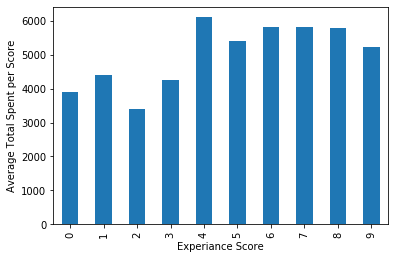

In [64]:
table5['TOTAL SPENT'].plot(kind='bar')
plt.xlabel('Experiance Score')
plt.ylabel('Average Total Spent per Score')
plt.show()

we can see from the chart that customers with experience scores 1-4 have lower average spend than customers with higher experience scores(5-10).

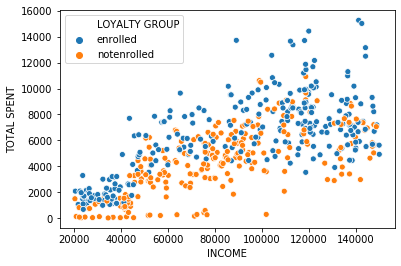

In [65]:
import seaborn as sns
sns.scatterplot(x=customer_all_view['INCOME'], y=customer_all_view['TOTAL SPENT'], hue =customer_all_view['LOYALTY GROUP'])
#plt.xlabel('INCOME')
#plt.ylabel('Total Spent')
#plt.show()

From the above, we see that there is a positive relationship btw income, total spent and loyalty group. Customers who have enrolled in the loyalty program spend more on an average than customers who are not-enrolled.

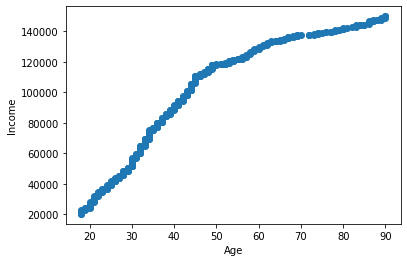

In [66]:
plt.scatter(customer_all_view['AGE'], customer_all_view['INCOME'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

With the relationships we have discovered, we would build up clustering, regresssion and classification models.